**Title:** **State-Wise Effects of Student Performance in India**

**Problem statement:**
   - “This analysis examines how student performance (average marks, performance category) varies across Indian states when grouped by two key academic‑resource factors: home internet facility and weekly study time. By comparing states, we identify which states’ students benefit most from high study hours and internet access, and which states face performance gaps despite resource availability.”
   

In [6]:
# Importing/loading the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/students_dataset_700_enhanced.csv')
df



,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,region,city,age,family_income_bracket,study_time_weekly,absences,tutor_support
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,South,PONNUR,18,<2 lakhs,22,6,yes
1,2,SHAIK IMRAN,M,100,99,99,shaik.imran@example.com,yes,9,Andhra Pradesh,South,Guntur,19,<2 lakhs,8,4,yes
2,3,SHAIK FAZAL,M,100,99,98,shaik.fazal@example.com,no,9,Andhra Pradesh,South,Guntur,16,<2 lakhs,2,7,yes
3,4,Richa Joshi,F,57,39,60,richa.joshi4@example.com,yes,6,Kerala,South,Ernakulam,17,2-5 lakhs,11,13,no
4,5,Preeti Mehta,F,91,91,95,preeti.mehta5@example.com,yes,10,Haryana,North,Chandigarh,15,>5 lakhs,8,8,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,Rahul Joshi,M,47,98,56,rahul.joshi696@example.com,yes,7,Himachal Pradesh,North,Shimla,16,>5 lakhs,25,9,yes
696,697,Arjun Singh,M,76,47,54,arjun.singh697@example.com,yes,6,Karnataka,South,Mysuru,19,<2 lakhs,2,10,no
697,698,Ankit Menon,M,90,44,74,ankit.menon698@example.com,yes,7,Uttar Pradesh,North,Kanpur,15,2-5 lakhs,17,1,no
698,699,Manish Mukherjee,M,97,40,89,manish.mukherjee699@example.com,yes,8,West Bengal,East,Howrah,15,>5 lakhs,4,7,no


In [7]:
df.head(2)

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,region,city,age,family_income_bracket,study_time_weekly,absences,tutor_support
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,South,PONNUR,18,<2 lakhs,22,6,yes
1,2,SHAIK IMRAN,M,100,99,99,shaik.imran@example.com,yes,9,Andhra Pradesh,South,Guntur,19,<2 lakhs,8,4,yes


In [ ]:
df.tail(3)

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,region,city,age,family_income_bracket,study_time_weekly,absences,tutor_support
697,698,Ankit Menon,M,90,44,74,ankit.menon698@example.com,yes,7,Uttar Pradesh,North,Kanpur,15,2-5 lakhs,17,1,no
698,699,Manish Mukherjee,M,97,40,89,manish.mukherjee699@example.com,yes,8,West Bengal,East,Howrah,15,>5 lakhs,4,7,no
699,700,Priya Sharma,F,100,58,50,priya.sharma700@example.com,no,7,Chhattisgarh,Central,Bilaspur,16,2-5 lakhs,15,6,no


In [8]:
df.shape

(700, 17)

In [14]:
df.describe()

,id,marks_in_physics,marks_in_maths,marks_in_chemistry,grades,age,study_time_weekly,absences,total_marks,Average_marks
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,66.445714,64.318571,64.980000,7.024286,17.024286,13.188571,7.530000,195.744286,65.248095
std,202.21688,20.647562,19.957321,20.988713,1.213059,1.408429,7.234980,4.368631,35.856239,11.952080
min,1.00000,30.000000,30.000000,30.000000,4.000000,15.000000,1.000000,0.000000,100.000000,33.333333
25%,175.75000,50.000000,47.000000,46.000000,6.000000,16.000000,7.000000,4.000000,170.000000,56.666667
50%,350.50000,66.000000,64.500000,64.000000,7.000000,17.000000,13.000000,8.000000,194.000000,64.666667
75%,525.25000,85.000000,81.000000,84.000000,8.000000,18.000000,19.250000,11.000000,220.000000,73.333333
max,700.00000,100.000000,100.000000,100.000000,10.000000,19.000000,25.000000,15.000000,300.000000,100.000000


In [ ]:
df.dtypes

,0
id,int64
name,object
gender,object
marks_in_physics,int64
marks_in_maths,int64
marks_in_chemistry,int64
email,object
internet_facility,object
grades,int64
state,object


In [84]:
# as part of data cleaning checking for the null columns in the df
df.isnull().sum()

,0
id,0
name,0
gender,0
marks_in_physics,0
marks_in_maths,0
marks_in_chemistry,0
email,0
internet_facility,0
grades,0
state,0


In [ ]:
# no duplicate entries are present in my dataset
print(df.duplicated().sum())

0


In [ ]:
# dropping off the column which is not part of my analysis

#df=df.drop(columns=['absences'],axis=1)


In [9]:
# creating a new column total marks

df.columns
df['total_marks']=df['marks_in_physics']+df['marks_in_maths']+df['marks_in_chemistry']
df['total_marks'].head(4)

,total_marks
0,300
1,298
2,297
3,156


In [10]:
df['Average_marks']=df['total_marks']/3
df['Average_marks'].head(2)

,Average_marks
0,100.000000
1,99.333333


In [11]:
# adding the column with existed field

df['Student_name']=df['name']
df

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,region,city,age,family_income_bracket,study_time_weekly,absences,tutor_support,total_marks,Average_marks,Student_name
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,South,PONNUR,18,<2 lakhs,22,6,yes,300,100.000000,SHAIK MOULALI
1,2,SHAIK IMRAN,M,100,99,99,shaik.imran@example.com,yes,9,Andhra Pradesh,South,Guntur,19,<2 lakhs,8,4,yes,298,99.333333,SHAIK IMRAN
2,3,SHAIK FAZAL,M,100,99,98,shaik.fazal@example.com,no,9,Andhra Pradesh,South,Guntur,16,<2 lakhs,2,7,yes,297,99.000000,SHAIK FAZAL
3,4,Richa Joshi,F,57,39,60,richa.joshi4@example.com,yes,6,Kerala,South,Ernakulam,17,2-5 lakhs,11,13,no,156,52.000000,Richa Joshi
4,5,Preeti Mehta,F,91,91,95,preeti.mehta5@example.com,yes,10,Haryana,North,Chandigarh,15,>5 lakhs,8,8,yes,277,92.333333,Preeti Mehta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,Rahul Joshi,M,47,98,56,rahul.joshi696@example.com,yes,7,Himachal Pradesh,North,Shimla,16,>5 lakhs,25,9,yes,201,67.000000,Rahul Joshi
696,697,Arjun Singh,M,76,47,54,arjun.singh697@example.com,yes,6,Karnataka,South,Mysuru,19,<2 lakhs,2,10,no,177,59.000000,Arjun Singh
697,698,Ankit Menon,M,90,44,74,ankit.menon698@example.com,yes,7,Uttar Pradesh,North,Kanpur,15,2-5 lakhs,17,1,no,208,69.333333,Ankit Menon
698,699,Manish Mukherjee,M,97,40,89,manish.mukherjee699@example.com,yes,8,West Bengal,East,Howrah,15,>5 lakhs,4,7,no,226,75.333333,Manish Mukherjee


In [12]:
# categorizing students based on average marks

def performance(avg):
  if avg>=85:
    return 'Excellent'
  elif avg>=70:
    return 'very good'
  elif avg>=50:
    return 'Average'
  else:
    return 'Poor'

df['performance']=df['Average_marks'].apply(performance)
df['performance'].head(2)

,performance
0,Excellent
1,Excellent


In [13]:
# dropping the columns student_name
df.drop('Student_name',axis=1,inplace=True)

In [13]:
df.head(1)

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,region,city,age,family_income_bracket,study_time_weekly,absences,tutor_support,total_marks,Average_marks,performance
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,South,PONNUR,18,<2 lakhs,22,6,yes,300,100.0,Excellent


In [14]:
#feature engineering
df['internet_access']=df['internet_facility'].map({'yes':1,'no':0})
df.head(1)

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,...,city,age,family_income_bracket,study_time_weekly,absences,tutor_support,total_marks,Average_marks,performance,internet_access
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,...,PONNUR,18,<2 lakhs,22,6,yes,300,100.0,Excellent,0


In [15]:
df['family_income_bracket'].dtype

dtype('O')

In [16]:
# i want to remove 'lakhs' substring in the dataframe in family_income_bracket
df['family_income_bracket'].unique()
df['family_income_bracket']=df['family_income_bracket'].str.replace('lakhs','',regex=True).str.strip()
df['family_income_bracket']

,family_income_bracket
0,<2
1,<2
2,<2
3,2-5
4,>5
...,...
695,>5
696,<2
697,2-5
698,>5


In [17]:
df['family_income_bracket']=df['family_income_bracket'].map({'<2':2,'2-5':3,'>5':5})
df['family_income_bracket'].head(1)

,family_income_bracket
0,2


In [18]:
#renaming the column
df.rename(columns={'family_income_bracket':'family_income_in_lakhs'},inplace=True)
df.head(1)

,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,...,city,age,family_income_in_lakhs,study_time_weekly,absences,tutor_support,total_marks,Average_marks,performance,internet_access
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,...,PONNUR,18,2,22,6,yes,300,100.0,Excellent,0


In [19]:
vals = df['family_income_in_lakhs'].tolist()
print(vals[:10])

[2, 2, 2, 3, 5, 5, 5, 3, 5, 2]


In [20]:
df['family_income_in_lakhs'].head()

,family_income_in_lakhs
0,2
1,2
2,2
3,3
4,5


In [21]:
df['tutor_support_access']=df['tutor_support'].map({'yes':1,'no':0})
df['tutor_support_access'].head(1)

,tutor_support_access
0,1


In [22]:
df['Resource_availability']=((df['internet_access']==1) & (df['tutor_support_access'] ==1)).astype(int)
df['Resource_availability(yes/no)']=df['Resource_availability'].map({0:'no',1:'yes'})
df['Resource_availability(yes/no)']
df.head(2)


,id,name,gender,marks_in_physics,marks_in_maths,marks_in_chemistry,email,internet_facility,grades,state,...,study_time_weekly,absences,tutor_support,total_marks,Average_marks,performance,internet_access,tutor_support_access,Resource_availability,Resource_availability(yes/no)
0,1,SHAIK MOULALI,M,100,100,100,shaik.moulali@example.com,no,10,Andhra Pradesh,...,22,6,yes,300,100.000000,Excellent,0,1,0,no
1,2,SHAIK IMRAN,M,100,99,99,shaik.imran@example.com,yes,9,Andhra Pradesh,...,8,4,yes,298,99.333333,Excellent,1,1,1,yes


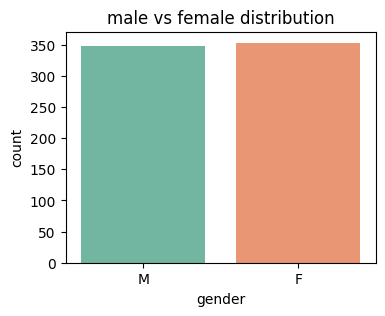

In [42]:
# barplot
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.countplot(x='gender',data=df,palette='Set2')
plt.title("male vs female distribution")
plt.show()

In [ ]:
# for the above graph the insight is females students are slightly higher than males students
# no of females students took exam more than male students

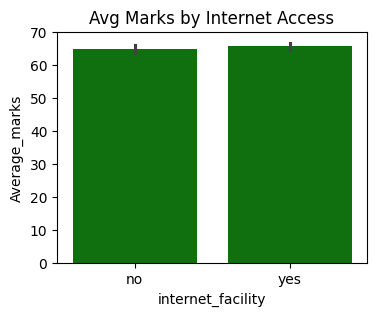

In [41]:
plt.figure(figsize=(4,3))
sns.barplot(x='internet_facility',y='Average_marks',data=df,color='g')
plt.title("Avg Marks by Internet Access")
plt.show()

# here students whose are having internet facility have slightly higher average marks than students who are not having internet facility

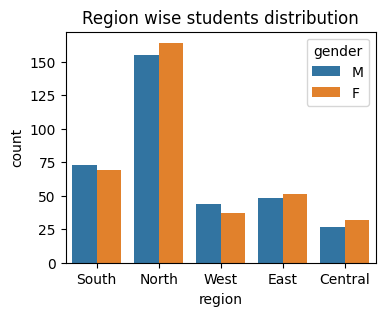

In [53]:
df.columns
plt.figure(figsize=(4,3))
sns.countplot(x='region',hue='gender',data=df)
plt.title('Region wise students distribution')
plt.show()

# insights:
# Students from North region are more compared to other regions
# males students are high in number compared to females in South and western region

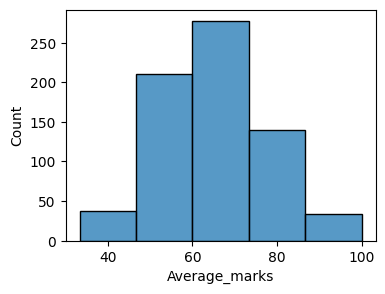

In [57]:

plt.figure(figsize=(4,3))
sns.histplot(x='Average_marks',bins=5,data=df)
plt.show()

# insights
# the largest proportion of students scored approximately 60-80 range. Fewer students scored significantly below 60 or above 80.


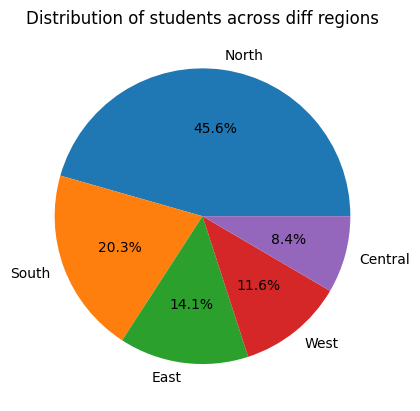

In [88]:
region=df['region'].value_counts(normalize=True)*100
plt.pie(region,labels=region.index,autopct='%1.1f%%')
plt.title('Distribution of students across diff regions')
plt.show()

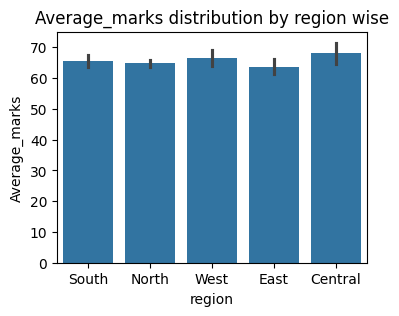

In [61]:
plt.figure(figsize=(4,3))
sns.barplot(x='region',y='Average_marks',data=df)
plt.title('Average_marks distribution by region wise')
plt.show()
# insights:
# students from central region have scored the highest marks and students from east region scored less marks

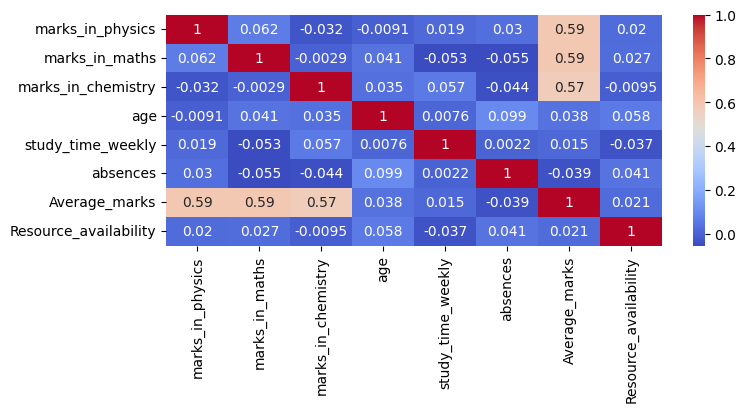

In [79]:
plt.figure(figsize=(8,3))
corr=df[['marks_in_physics','marks_in_maths','marks_in_chemistry','age',
         'study_time_weekly','absences','Average_marks','Resource_availability']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# Average marks are good when increasing with the marks in physics,maths,chemistry
# students who has less attendance percentage they are scoring lesser average marks (absense is effecting heavily average score)